In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from statistics.cramer import categorical_relation_with, cross_categorical
from statistics.cat_to_num import apply_across

from tools.datasets import get_boston, get_heart, get_houses, get_prudential

# data, labels, continuous, discrete, dummy, categorical = get_boston()
# data, labels, continuous, discrete, dummy, categorical = get_heart()
# data, labels, continuous, discrete, dummy, categorical = get_houses()
data, labels, continuous, discrete, dummy, categorical = get_prudential()

In [5]:
top = categorical_relation_with(data, 'num', categorical + dummy)
top_categorical = top[0].sort_values(ascending=False).index[0:10]
top[0].sort_values(ascending=False)[0:10]

thal          0.527093
exang         0.464224
chest_pain    0.462448
sex           0.251052
restecg       0.186024
fbs           0.091146
dtype: float64

In [22]:
from statistics.cat_to_num import spearman_with

correlation = spearman_with(data.fillna(0), 'Response', continuous)
correlation = pd.Series({col: res for col, res in correlation.items()})
correlation.sort_values(ascending=False)

Product_Info_4         0.244780
Family_Hist_2          0.152763
Family_Hist_4          0.103904
Employment_Info_1      0.057363
Insurance_History_5    0.045836
Employment_Info_6      0.018128
Employment_Info_4     -0.033891
Ht                    -0.121618
Family_Hist_3         -0.152741
Family_Hist_5         -0.165906
Ins_Age               -0.219382
Wt                    -0.397386
BMI                   -0.426345
dtype: float64

In [62]:
#  prudential
top_categorical = ['Medical_History_4', 'Medical_Keyword_15', 'Medical_Keyword_3',
       'Medical_History_23', 'InsuredInfo_6', 'Medical_Keyword_48',
       'Medical_History_39', 'Medical_Keyword_23', 'Medical_History_33',
       'Product_Info_2']
top_numerical = ['BMI', 'Wt', 'Product_Info_4', 'Ins_Age', 'Family_Hist_5',
       'Family_Hist_2', 'Family_Hist_3', 'Ht', 'Family_History_4']
# unrelated = ['Medical_Keyword_32']
# 
# # for heart
# unrelated = ['fbs']
# top_categorical = categorical


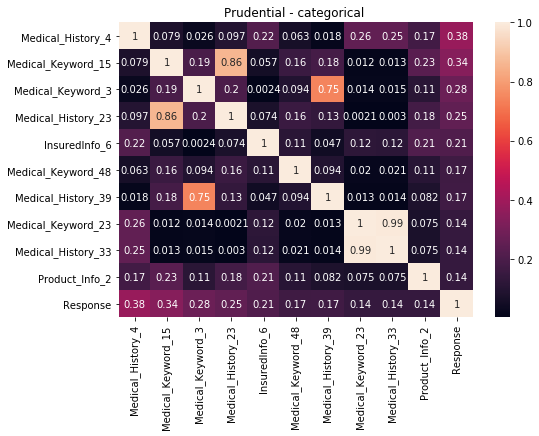

In [43]:
v, p = cross_categorical(data, list(top_categorical) + ['Response'])

sns_plot = sns.heatmap(v, annot=True)
sns_plot.get_figure().set_size_inches(8,6)

# plt.xticks(rotation=75)
# plt.yticks(rotation=20)
plt.tight_layout()
sns_plot.set_title("Prudential - categorical ")
sns_plot.get_figure().savefig('./figures/analysis/prudential_categorical_corr.png')

Text(0.5,1,'Prudential - numerical ')

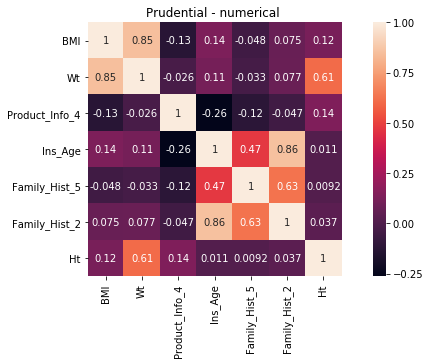

In [106]:
top_numerical = ['BMI', 'Wt', 'Product_Info_4', 'Ins_Age', 'Family_Hist_5',
       'Family_Hist_2', 'Ht']

corrmat = data[top_numerical].corr(method='pearson')
f, ax = plt.subplots(figsize=(9, 5))
sns_plot = sns.heatmap(corrmat, square=True, annot=True)
plt.tight_layout()
sns_plot.set_title("Prudential - numerical ")
# sns_plot.get_figure().savefig('./figures/analysis/prudential_num_corr.png')

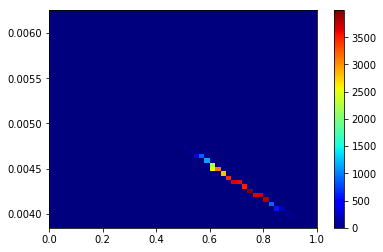

In [104]:
x = data['Ht']
y = data['1/ht2']
plt.hist2d(x, y, (50, 50), cmap=plt.cm.jet)
plt.colorbar()